In [27]:
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
df = pd.read_excel('dados.xlsx')
dados = pd.DataFrame(df)

# Como o target ID apenas contabiliza a pessoa, logo não é relevante para a análise.
dados = df.drop('ID', axis=1)
dados

,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31879,Acolhido,Neste centro de acolhida (aqui),Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,Sim,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31880,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,Sim,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31882,Acolhido,Neste centro de acolhida (aqui),Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,Sim,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


In [29]:
dados['Onde dormiu ontem'] = dados['Onde dormiu ontem'].apply(lambda x: 'CA' if x == 'Neste centro de acolhida (aqui)' else x)
dados

,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31879,Acolhido,CA,Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,Sim,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31880,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,Sim,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31882,Acolhido,CA,Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,Sim,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


In [30]:
ordem_faixa = ['Até 11', '12 a 17', '18 a 30', '31 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90 a 99', 'Sem informação']
ordem_classificacao = ['Criança', 'Adolescente', 'Juventude', 'Adulto', 'Idoso', 'Sem classificação']

In [31]:
dados['Faixa de idade'] = pd.Categorical(dados['Faixa de idade'], categories=ordem_faixa, ordered=True)

In [32]:
dados['Classificação de idade'] = pd.Categorical(dados['Classificação de idade'], categories=ordem_classificacao, ordered=True)

# Fazendo a análise exploratória com as faixas de idade.

In [33]:
dados['Faixa de idade'].value_counts()

31 a 49           10901
Sem informação     9805
18 a 30            4086
50 a 59            3744
60 a 69            2104
70 a 79             460
Até 11              375
12 a 17             301
80 a 89              98
90 a 99              10
Name: Faixa de idade, dtype: int64

### 1) Cruzando dados referentes a situação de rua e as faixas de idade.

In [34]:
pd.crosstab(dados['Situação de rua'], dados['Faixa de idade'], normalize='columns')*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação
Situação de rua,,,,,,,,,,
Acolhido,92.0,34.219269,38.007832,44.096872,52.297009,68.773764,72.173913,80.612245,100.0,20.81591
Rua,8.0,65.780731,61.992168,55.903128,47.702991,31.226236,27.826087,19.387755,0.0,79.18409


In [35]:
pd.crosstab(dados['Situação de rua'], dados['Faixa de idade'])

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação
Situação de rua,,,,,,,,,,
Acolhido,345,103,1553,4807,1958,1447,332,79,10,2041
Rua,30,198,2533,6094,1786,657,128,19,0,7764


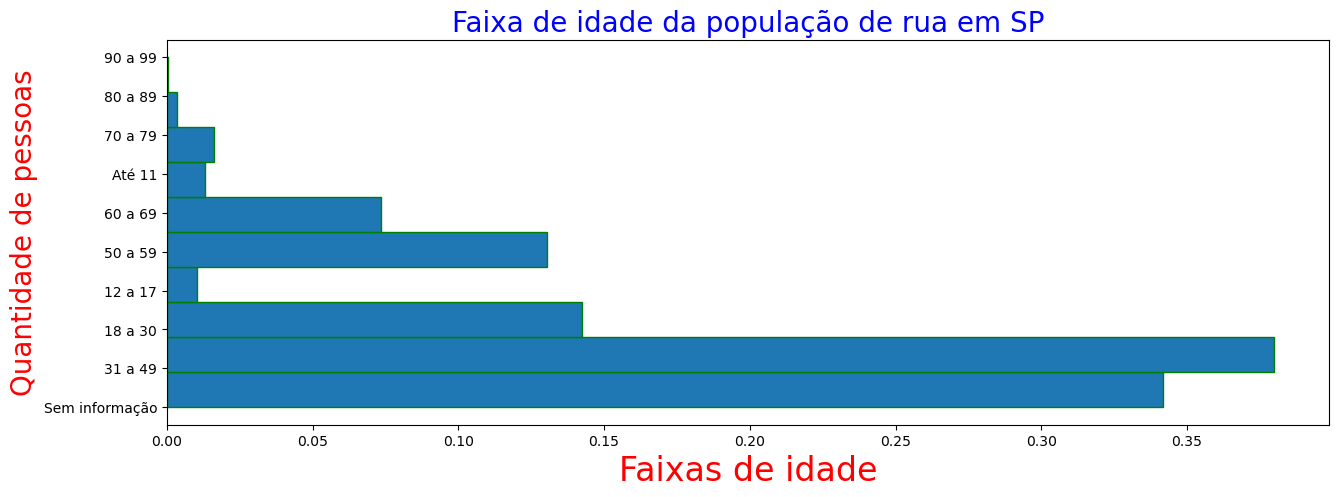

In [36]:
plt.figure(figsize=(15,5))
plt.hist(pd.Categorical(dados['Faixa de idade'], categories=ordem_faixa, ordered=True), edgecolor='green', density=True, orientation='horizontal')

plt.xlabel('Faixas de idade', fontsize=24, color='red')
plt.ylabel('Quantidade de pessoas', fontsize=20, color='red')

plt.title('Faixa de idade da população de rua em SP', fontsize=20, color='blue')
plt.show()

In [37]:
dados['Classificação de idade'].value_counts()

Adulto               14645
Juventude             4086
Idoso                 2672
Criança                375
Adolescente            301
Sem classificação        0
Name: Classificação de idade, dtype: int64

In [38]:
pd.crosstab(dados['Situação de rua'], dados['Classificação de idade'], normalize='columns') * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso
Situação de rua,,,,,
Acolhido,92.0,34.219269,38.007832,46.19324,69.91018
Rua,8.0,65.780731,61.992168,53.80676,30.08982


In [39]:
pd.crosstab(dados['Situação de rua'], dados['Classificação de idade'])

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso
Situação de rua,,,,,
Acolhido,345,103,1553,6765,1868
Rua,30,198,2533,7880,804


# Lendo a base de dados socioeconômica.

In [40]:
df_socio = pd.read_excel('socio.xlsx')
df_socio

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,335503001,Aricanduva / Vila Formosa,355030,São Paulo,RM São Paulo (SP),63500,2000,74.49,1.63,15.4,...,97.43,67.27,95.42,93.70,0.578,0.718,0.762,0.668,0.825,0.804
1,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2000,75.53,1.68,13.8,...,96.18,60.39,93.51,87.79,0.635,0.680,0.789,0.665,0.842,0.876
2,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2000,74.37,2.01,15.6,...,94.18,48.53,90.86,87.20,0.481,0.582,0.699,0.546,0.823,0.760
3,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2000,70.97,2.21,21.6,...,93.15,47.55,90.05,83.96,0.468,0.550,0.656,0.521,0.766,0.707
4,335503005,Casa Verde,355030,São Paulo,RM São Paulo (SP),63500,2000,74.59,1.85,15.2,...,95.33,58.11,92.79,89.05,0.550,0.652,0.732,0.616,0.827,0.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,335503027,São Miguel Paulista,355030,São Paulo,RM São Paulo (SP),63500,2010,74.30,1.70,15.8,...,96.65,64.99,93.92,91.26,0.591,0.741,0.736,0.687,0.822,0.705
58,335503028,Sé,355030,São Paulo,RM São Paulo (SP),63500,2010,80.33,1.23,7.8,...,95.24,71.34,92.12,89.91,0.818,0.799,0.889,0.805,0.922,0.947
59,335503029,Vila Maria / Vila Guilherme,355030,São Paulo,RM São Paulo (SP),63500,2010,77.88,1.43,10.7,...,95.63,63.53,92.29,90.24,0.659,0.749,0.793,0.718,0.881,0.787
60,335503030,Vila Mariana,355030,São Paulo,RM São Paulo (SP),63500,2010,81.35,1.16,6.7,...,97.55,78.91,96.34,94.10,0.899,0.868,0.938,0.878,0.939,1.000


In [41]:
df_socio_2010 = df_socio[(df_socio.ANO == 2010)]
list(df_socio_2010.NOME_REG)

['Aricanduva / Vila Formosa',
 'Butantã',
 'Campo Limpo',
 'Capela do Socorro',
 'Casa Verde',
 'Cidade Ademar',
 'Cidade Tiradentes',
 'Ermelino Matarazzo',
 'Freguesia do Ó / Brasilândia',
 'Guaianases',
 'Ipiranga',
 'Itaim Paulista',
 'Itaquera',
 'Jabaquara',
 'Jaçanã / Tremembé',
 'Lapa',
 "M'Boi Mirim",
 'Mooca',
 'Parelheiros',
 'Penha',
 'Perus',
 'Pinheiros',
 'Pirituba / Jaraguá',
 'Santana / Tucuruvi',
 'Santo Amaro',
 'São Mateus',
 'São Miguel Paulista',
 'Sé',
 'Vila Maria / Vila Guilherme',
 'Vila Mariana',
 'Vila Prudente']

In [42]:
dict_replace = {
'Aricanduva / Vila Formosa': 'Aricanduva-Formosa-Carrão',
'Casa Verde': 'Casa Verde-Cachoeirinha',
'Freguesia do Ó / Brasilândia': 'Freguesia-Brasilândia',
'Jaçanã / Tremembé': 'Jaçanã-Tremembé',
'Pirituba / Jaraguá': 'Pirituba-Jaraguá',
'Santana / Tucuruvi': 'Santana-Tucuruvi',
'São Miguel Paulista': 'São Miguel',
'Vila Maria / Vila Guilherme': 'Vila Maria-Vila Guilherme',
}

df_socio_2010 = df_socio_2010.replace(dict_replace)

In [43]:
df_socio_2010.head(5)

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
31,335503001,Aricanduva-Formosa-Carrão,355030,São Paulo,RM São Paulo (SP),63500,2010,78.20,1.37,10.3,...,96.47,71.40,94.13,89.17,0.704,0.781,0.822,0.754,0.887,0.831
32,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2010,79.70,1.35,8.5,...,96.49,63.04,92.71,88.91,0.731,0.753,0.859,0.746,0.912,0.932
33,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2010,78.00,1.55,10.5,...,96.29,58.66,92.80,90.72,0.603,0.707,0.783,0.670,0.883,0.810
34,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2010,75.22,1.71,14.4,...,96.51,62.30,93.86,92.12,0.592,0.724,0.750,0.677,0.837,0.745
35,335503005,Casa Verde-Cachoeirinha,355030,São Paulo,RM São Paulo (SP),63500,2010,77.95,1.44,10.6,...,95.58,64.89,92.39,90.33,0.678,0.757,0.799,0.730,0.883,0.792


In [44]:
df_socio_2010 = df_socio_2010.drop(['Cod_Reg','NOME_REG', 'COD_MUN', 'NOME_MUN', 'NOME_RM', 'CODRM', 'ANO'], axis=1)

In [45]:
df_socio_2010.head(5)

,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
31,78.20,1.37,10.3,11.91,96.06,87.77,41.77,12.01,10.91,1.53,...,96.47,71.40,94.13,89.17,0.704,0.781,0.822,0.754,0.887,0.831
32,79.70,1.35,8.5,9.84,96.73,89.70,38.92,8.63,10.15,1.13,...,96.49,63.04,92.71,88.91,0.731,0.753,0.859,0.746,0.912,0.932
33,78.00,1.55,10.5,12.20,95.96,87.50,40.62,4.67,10.06,1.07,...,96.29,58.66,92.80,90.72,0.603,0.707,0.783,0.670,0.883,0.810
34,75.22,1.71,14.4,16.67,94.54,83.61,41.50,5.07,10.45,1.44,...,96.51,62.30,93.86,92.12,0.592,0.724,0.750,0.677,0.837,0.745
35,77.95,1.44,10.6,12.28,95.94,87.44,41.47,8.61,10.55,0.62,...,95.58,64.89,92.39,90.33,0.678,0.757,0.799,0.730,0.883,0.792


<AxesSubplot:>

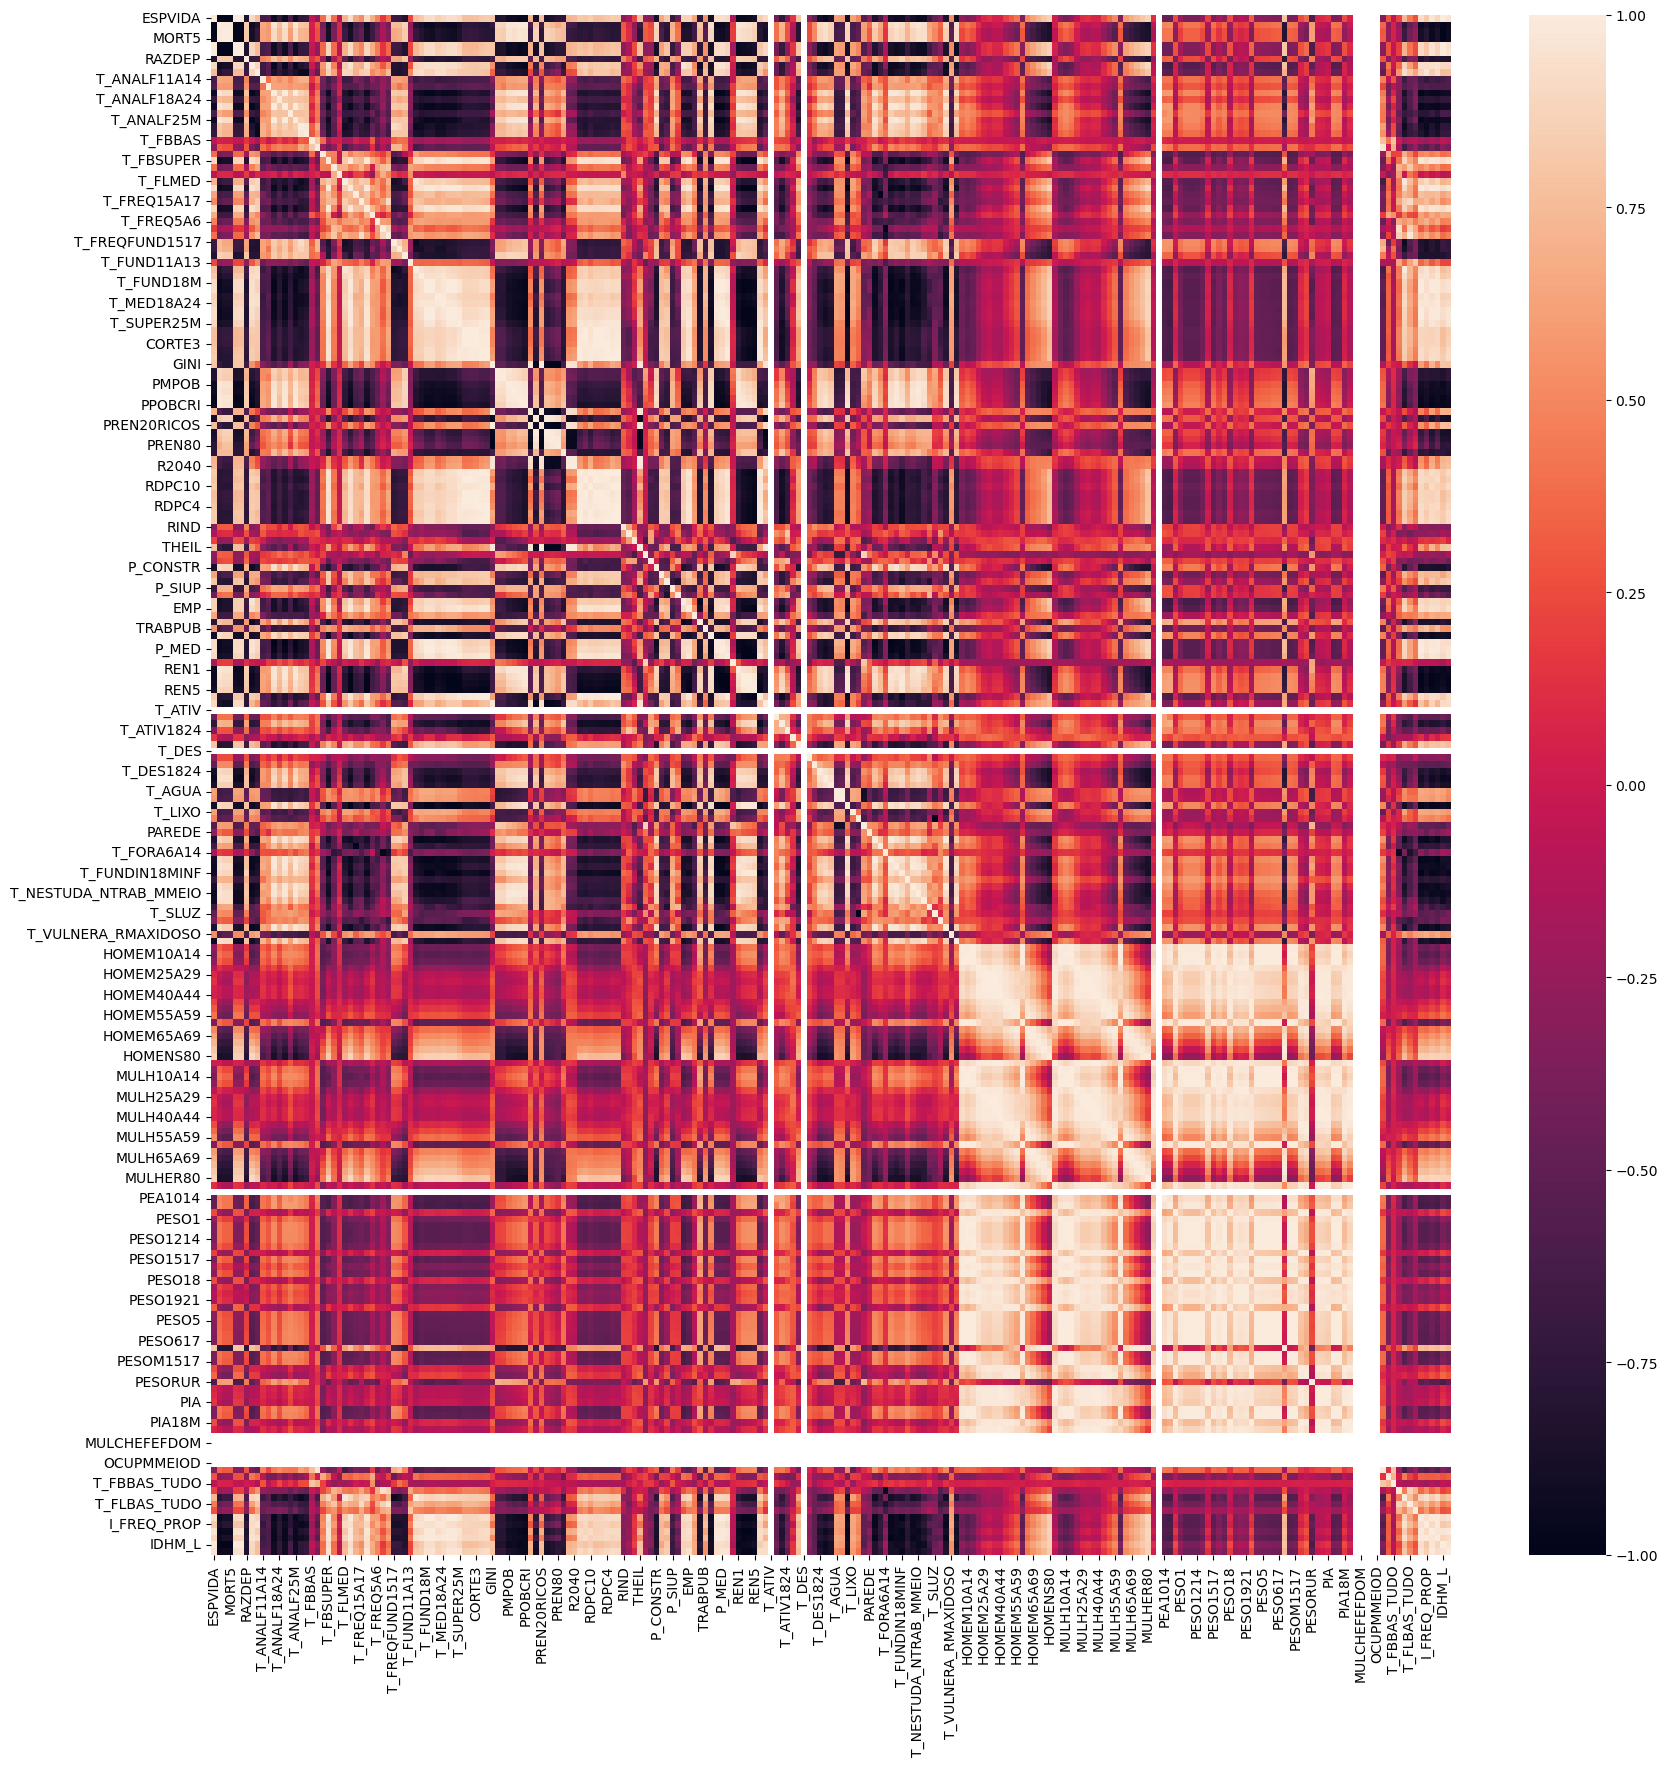

In [56]:
plt.figure(figsize=(20,20))
dados
matriz_corr = df_socio_2010.corr()

sns.heatmap(matriz_corr)

In [ ]:
def correlacao(base):
    for target in 